# Book Genre Prediction
###  --CE 621

#### Group : 3 
#### Members : Desai Priyal,Ghata Saraiya,Maliha Nan  

### Table of Contents

1. [Necessary Imports](#imports)
2. [Blurb Genre Collection](#blurb)
    1. [Data Cleaning](#clean)
    2. [Multiple Features](#multifeatures)
        1. [Converting to dictionary](#convertingtodict)
        2. [Accuracy](#multiaccuracy)
    3. [Multiple Labels Classification](#multilabels)
        1. [Converting the dataframe for fitting into binary format](#convertdftobin)
        2. [Distribution of books across Genres](#one)
        3. [Conversion](#two)
        4. [TF-IDF Vectorisation](#three)
        5. [Classification and Accuracy](#four)
        6. [MultiLabel Binarizer and Corresponding F1 score](#five)
    
3. [CMU Book Summary Dataset](#six)
    1. [Data Augmentation](#seven)  
    2. [Data cleaning](#eight)
    3. [Classifying using augemented data](#nine)
    
4. [Dumping into pickle file](#ten)
   

# Necessary Imports:
<a id="imports"></a>

In [1]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from num2words import num2words
from collections import Counter
import csv
import tf_idf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import json
from tqdm import tqdm
import pandas as pd
from xml.etree import ElementTree

# Blurb Genre Collection
Extracting XML data
<a id="blurb"></a>

In [2]:
dataset=[]
tree = ElementTree.parse('./test.xml')
root = tree.getroot()

for book in root.findall('book'):
    i=0
    for metadata in book.find('metadata'):
        if(i==0):
            x=metadata
        if(i==1):
            author=metadata.text
        if(i==2):
            published=metadata.text
        if(i==3):
            pagenum=metadata.text
        if(i==4):
            break
        i+=1
        
    
    
    s=''    
    if(x.find('d1')!=None):
        s=x.find('d1').text
    else:
        s=x.find('d0').text
            
    
    dataset.append([book.find('title').text,s,book.find('body').text,author,published,pagenum])
    
    
tree = ElementTree.parse('./train.xml')
root = tree.getroot()

for book in root.findall('book'):
    i=0
    for metadata in book.find('metadata'):
        if(i==0):
            x=metadata
        if(i==1):
            author=metadata.text
        if(i==2):
            published=metadata.text
        if(i==3):
            pagenum=metadata.text
        if(i==4):
            break
        i+=1
        
    
    
    s=''    
    if(x.find('d1')!=None):
        s=x.find('d1').text
    else:
        s=x.find('d0').text
            
    
    dataset.append([book.find('title').text,s,book.find('body').text,author,published,pagenum])

In [3]:
df=pd.DataFrame(dataset,columns=['Name','Genres','Summary',
                                 'Author','Published','PageNum'])
df

,Name,Genres,Summary,Author,Published,PageNum
0,Teenage Mutant Ninja Turtles: The Box Set Volu...,Graphic Novels and Manga,TMNT co-creator Kevin Eastman and writer Tom W...,"Kevin Eastman, Tom Waltz","Dec 15, 2015",520 Pages
1,Betty and Veronica: Fairy Tales,Children’s Middle Grade Books,Take a magical trip down Storybook Lane with t...,Archie Superstars,"Dec 06, 2016",256 Pages
2,Friends and Fauxs,Women’s Fiction,"Tracie Howard is back with all of the Gucci, g...",Tracie Howard,"Jul 28, 2009",288 Pages
3,Anti-Education,Religion and Philosophy,"AN NYRB Classics OriginalIn 1869, at the age o...",Friedrich Nietzsche,"Dec 15, 2015",160 Pages
4,Fallout,Mystery and Suspense,A first-class letter–containing a single sheet...,Tetsuo Takashima,"Jan 29, 2013",288 Pages
...,...,...,...,...,...,...
77104,Design and Crime (And Other Diatribes),Politics,In these diatribes on the marketing of culture...,Hal Foster,"Jan 10, 2011",192 Pages
77105,The Things We Cherished,Literary Fiction,Charlotte Gold is shocked when her ex-fiancé B...,Pam Jenoff,"Jul 10, 2012",304 Pages
77106,"National Geographic Traveler: Madrid, 2nd Edition",Travel,All the travel experts agreeconsumers want mo...,Annie Bennett,"Mar 24, 2009",272 Pages
77107,Hate Crime,Nonfiction,"On June 7, 1998, James Byrd Jr., a forty-nine-...",Joyce King,"Dec 02, 2003",240 Pages


### Data Cleaning
<a id="clean"></a>

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = df
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['Summary'] = data['Summary'].str.lower()
data['Summary'] = data['Summary'].apply(cleanHtml)
data['Summary'] = data['Summary'].apply(cleanPunc)
data['Summary'] = data['Summary'].apply(keepAlpha)

In [5]:

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['Summary'] = data['Summary'].apply(removeStopWords)


In [6]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['Summary'] = data['Summary'].apply(stemming)

In [7]:
df

,Name,Genres,Summary,Author,Published,PageNum
0,Teenage Mutant Ninja Turtles: The Box Set Volu...,Graphic Novels and Manga,tmnt co creator kevin eastman writer tom waltz...,"Kevin Eastman, Tom Waltz","Dec 15, 2015",520 Pages
1,Betty and Veronica: Fairy Tales,Children’s Middle Grade Books,take magic trip storybook lane collect best fa...,Archie Superstars,"Dec 06, 2016",256 Pages
2,Friends and Fauxs,Women’s Fiction,traci howard back gucci glitz glamour steami f...,Tracie Howard,"Jul 28, 2009",288 Pages
3,Anti-Education,Religion and Philosophy,nyrb classic originalin age twenti precoci bri...,Friedrich Nietzsche,"Dec 15, 2015",160 Pages
4,Fallout,Mystery and Suspense,first class letter contain singl sheet paper d...,Tetsuo Takashima,"Jan 29, 2013",288 Pages
...,...,...,...,...,...,...
77104,Design and Crime (And Other Diatribes),Politics,diatrib market cultur brand ident develop spec...,Hal Foster,"Jan 10, 2011",192 Pages
77105,The Things We Cherished,Literary Fiction,charlott gold shock ex fianc brian appear door...,Pam Jenoff,"Jul 10, 2012",304 Pages
77106,"National Geographic Traveler: Madrid, 2nd Edition",Travel,travel expert agre consum want differ experi t...,Annie Bennett,"Mar 24, 2009",272 Pages
77107,Hate Crime,Nonfiction,june jame byrd jr forti year old black man wal...,Joyce King,"Dec 02, 2003",240 Pages


## Multiple Features
<a id="multifeatures"></a>

In [8]:
df1=pd.DataFrame(dataset,columns=['Name','Genres','Summary','Author','Published','PageNum'])

In [9]:
df1['Summary']=data["Summary"]

In [10]:
Y= df1.drop(labels = ['Name','Summary','Author','Published','PageNum'], axis=1)
X= df1.drop(labels = ['Genres'], axis=1)


### Converting to dictionary  
<a id="convertingtodict"></a>

In [11]:
t=[]
for i in range(len(X)):
    d={}
    d['Name']=X.Name[i]
    d['Summary']=X.Summary[i]
    d['Author']=X.Author[i]
    #d['Published']=X.Published[i]
    #d['PageNum']=X.PageNum[i]
    q=(d,Y.Genres[i])
    t.append(q)
#print(t[0])


### Finding Accuracy
<a id="multiaccuracy"></a>


In [12]:
n=int(len(X)/3)
test_set_feat = t[n:]
train_set_feat= t[:(2*n)]

classifier = nltk.NaiveBayesClassifier.train(train_set_feat)

print(nltk.classify.accuracy(classifier, test_set_feat))
print(type(test_set_feat[0]))

0.7204800995992686
<class 'tuple'>


In [13]:
d={}
d['Summary']="In 1941, the first Neumann family member was taken by the Nazis, arrested in German-occupied Czechoslovakia for bathing in a stretch of river forbidden to Jews. He was transported to Auschwitz. Eighteen days later his prisoner number was entered into the morgue book.\
Of thirty-four Neumann family members, twenty-five were murdered by the Nazis. One of the survivors was Hans Neumann, who, to escape the German death net, traveled to Berlin and hid in plain sight under the Gestapo’s eyes. What Hans experienced was so unspeakable that, when he built an industrial empire in Venezuela, he couldn’t bring himself to talk about it. All his daughter Ariana knew was that something terrible had happened.\
When Hans died, he left Ariana a small box filled with letters, diary entries, and other memorabilia. Ten years later Ariana finally summoned the courage to have the letters translated, and she began reading. What she discovered launched her on a worldwide search that would deliver indelible portraits of a family loving, finding meaning, and trying to survive amid the worst that can be imagined.\
When Time Stopped is a detective story and an epic family memoir, spanning nearly ninety years and crossing oceans. Neumann brings each relative to vivid life. In uncovering her father’s story after all these years, she discovers nuance and depth to her own history and liberates poignant and thought-provoking truths about the threads of humanity that connect us all."
d['Name']="When Time Stopped"
d['Author']="Ariana Neumann"

print(classifier.classify(d))

Children’s Books


## MultiLabel Classification
<a id="multilabels"></a>

In [14]:
dataset=[]
tree = ElementTree.parse('./test.xml')
root = tree.getroot()

for book in root.findall('book'):
    for metadata in book.find('metadata'):
        #print(metadata)
        x=metadata
        break
    
    a=[]
    if(x.find('d3')!=None):  
        a.append(x.find('d3').text)
    if(x.find('d2')!=None):
        a.append(x.find('d2').text)
    if(x.find('d1')!=None):
        a.append(x.find('d1').text)
    if(x.find('d0')!=None):
        a.append(x.find('d0').text)
    
    dataset.append([book.find('title').text,a,book.find('body').text])

In [15]:

tree = ElementTree.parse('./train.xml')
root = tree.getroot()

for book in root.findall('book'):
    for metadata in book.find('metadata'):
        #print(metadata)
        x=metadata
        break
    
    a=[]
    if(x.find('d3')!=None):  
        a.append(x.find('d3').text)
    if(x.find('d2')!=None):
        a.append(x.find('d2').text)
    if(x.find('d1')!=None):
        a.append(x.find('d1').text)
    if(x.find('d0')!=None):
        a.append(x.find('d0').text)
    
    dataset.append([book.find('title').text,a,book.find('body').text])

In [18]:
df0=pd.DataFrame(dataset,columns=['Name','Genres','Summary'])

In [19]:
df0.Summary=df.Summary
df0

,Name,Genres,Summary
0,Teenage Mutant Ninja Turtles: The Box Set Volu...,"[Graphic Novels and Manga, Fiction]",tmnt co creator kevin eastman writer tom waltz...
1,Betty and Veronica: Fairy Tales,"[Children’s Middle Grade Books, Children’s Books]",take magic trip storybook lane collect best fa...
2,Friends and Fauxs,"[Women’s Fiction, Fiction]",traci howard back gucci glitz glamour steami f...
3,Anti-Education,"[Philosophy, Religion and Philosophy, Nonfiction]",nyrb classic originalin age twenti precoci bri...
4,Fallout,"[Espionage Mysteries, Mystery and Suspense, Fi...",first class letter contain singl sheet paper d...
...,...,...,...
77104,Design and Crime (And Other Diatribes),"[Art, Politics, Nonfiction]",diatrib market cultur brand ident develop spec...
77105,The Things We Cherished,"[Historical Romance, Literary Fiction, Fiction]",charlott gold shock ex fianc brian appear door...
77106,"National Geographic Traveler: Madrid, 2nd Edition","[Travel: Europe, Travel, Nonfiction]",travel expert agre consum want differ experi t...
77107,Hate Crime,[Nonfiction],june jame byrd jr forti year old black man wal...


### Converting the dataframe for fitting into binary format
<a id="convertdftobin"></a>

In [20]:
sGenres=set()
for i in range(len(df0)):
    for j in range(len(df0.Genres[i])):
        sGenres.add(df0.Genres[i][j])

gen={i:0 for i in sGenres}        
for i in range(len(df0)):
    for j in range(len(df0.Genres[i])):
        gen[df0.Genres[i][j]]+=1


### Distribution of books across Genres
<a id="one"></a>

In [21]:
d={k: v for k, v in sorted(gen.items(), key=lambda item: item[1])}
l=len(d)
d={x:d[x] for x in list(reversed(list(d)))}
print(sum(d.values()))
for key,value in d.items():
    print(key,":",value)

182497
Nonfiction : 27109
Fiction : 25547
Children’s Books : 16396
Children’s Middle Grade Books : 6416
Literary Fiction : 6101
Mystery and Suspense : 6028
Romance : 5140
Biography and Memoir : 4390
Religion and Philosophy : 4245
Religion : 3711
Graphic Novels and Manga : 3694
Classics : 3249
Teen and Young Adult : 3127
Cooking : 2468
Suspense and Thriller : 2355
Personal Growth : 2322
Politics : 2146
Arts and Entertainment : 1927
Contemporary Romance : 1725
Crime Mysteries : 1715
Fantasy : 1647
Philosophy : 1580
Science : 1579
Teen and Young Adult Fiction : 1506
Self-Improvement : 1488
Health and Fitness : 1485
History : 1337
World History : 1312
Popular Science : 1302
Science Fiction : 1272
Humor : 1184
Crafts, Home and Garden : 1128
Cooking Methods : 1101
Art : 1095
Reference : 1072
Parenting : 1072
Cozy Mysteries : 1057
Historical Romance : 1040
Western Fiction : 1034
Psychology : 1008
Children’s Middle Grade Action and Adventure Books : 1003
Epic Fantasy : 924
Paranormal Romance :

In [22]:
x=0
l=[]

for i in d.keys():
    l.append(i)
    x+=1
print(len(l))

139


### Conversion
<a id="two"></a>

In [23]:
#name,Summary,Literary,Fantasy,Historical,Science,Fiction,NonFiction,Children,Suspense,Romance,Philosophy,games/sports,Music,
#print(df.Genres)
dataset1=[[0 for i in range(len(l)+2)]for j in range(len(df0))]
        
for i in range(len(df0)):
    a=[0 for i in range(len(l)+2)]
    for j in range(len(df0.Genres[i])):
        if df0.Genres[i][j] in l:
            a[l.index(df0.Genres[i][j])+2]=1
    for j in range(len(l)+2):
        if(j==0):
            dataset1[i][j]=df0.Name[i]
            
        elif(j==1):
            dataset1[i][j]=df0.Summary[i]
            
        else:
            dataset1[i][j]=a[j]
x=[]            
for i in range(len(l)+2):
    if(i==0):
        x.append('Name')
    elif(i==1):
        x.append('Summary')
    else:
        x.append(l[i-2])
df1=pd.DataFrame(dataset1,columns=x)


In [24]:
df1

,Name,Summary,Nonfiction,Fiction,Children’s Books,Children’s Middle Grade Books,Literary Fiction,Mystery and Suspense,Romance,Biography and Memoir,...,Weddings,Beauty,Travel: Asia,Native American History,World War I Military History,Travel: Caribbean and Mexico,Travel: Central and South America,Travel: Africa,Travel: Middle East,Travel: Australia and Oceania
0,Teenage Mutant Ninja Turtles: The Box Set Volu...,tmnt co creator kevin eastman writer tom waltz...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Betty and Veronica: Fairy Tales,take magic trip storybook lane collect best fa...,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Friends and Fauxs,traci howard back gucci glitz glamour steami f...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anti-Education,nyrb classic originalin age twenti precoci bri...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fallout,first class letter contain singl sheet paper d...,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77104,Design and Crime (And Other Diatribes),diatrib market cultur brand ident develop spec...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77105,The Things We Cherished,charlott gold shock ex fianc brian appear door...,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77106,"National Geographic Traveler: Madrid, 2nd Edition",travel expert agre consum want differ experi t...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77107,Hate Crime,june jame byrd jr forti year old black man wal...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_Genre = df1.drop(['Name','Summary'], axis=1)
counts = []
categories = list(df_Genre.columns.values)
for i in categories:
    counts.append((i, df_Genre[i].sum()))
df_stats = pd.DataFrame(counts, columns=['Genre', 'number_of_blurbs'])
df_stats


,Genre,number_of_blurbs
0,Nonfiction,27109
1,Fiction,25547
2,Children’s Books,16396
3,Children’s Middle Grade Books,6416
4,Literary Fiction,6101
...,...,...
134,Travel: Caribbean and Mexico,8
135,Travel: Central and South America,7
136,Travel: Africa,7
137,Travel: Middle East,4


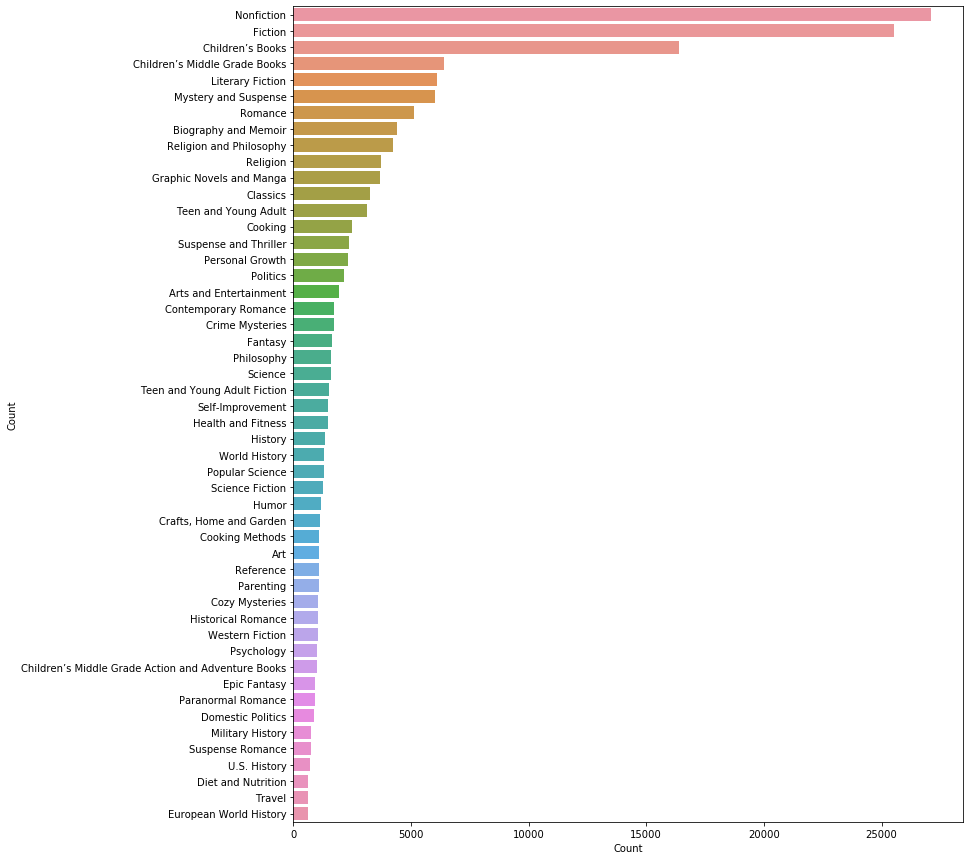

In [26]:
all_genres=sum(df0["Genres"],[])
all_genres = nltk.FreqDist(all_genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [27]:
df_Genre.columns.values

array(['Nonfiction', 'Fiction', 'Children’s Books',
       'Children’s Middle Grade Books', 'Literary Fiction',
       'Mystery and Suspense', 'Romance', 'Biography and Memoir',
       'Religion and Philosophy', 'Religion', 'Graphic Novels and Manga',
       'Classics', 'Teen and Young Adult', 'Cooking',
       'Suspense and Thriller', 'Personal Growth', 'Politics',
       'Arts and Entertainment', 'Contemporary Romance',
       'Crime Mysteries', 'Fantasy', 'Philosophy', 'Science',
       'Teen and Young Adult Fiction', 'Self-Improvement',
       'Health and Fitness', 'History', 'World History',
       'Popular Science', 'Science Fiction', 'Humor',
       'Crafts, Home and Garden', 'Cooking Methods', 'Art', 'Reference',
       'Parenting', 'Cozy Mysteries', 'Historical Romance',
       'Western Fiction', 'Psychology',
       'Children’s Middle Grade Action and Adventure Books',
       'Epic Fantasy', 'Paranormal Romance', 'Domestic Politics',
       'Military History', 'Suspense Roman

Text(0.5, 0, '# of Genres')

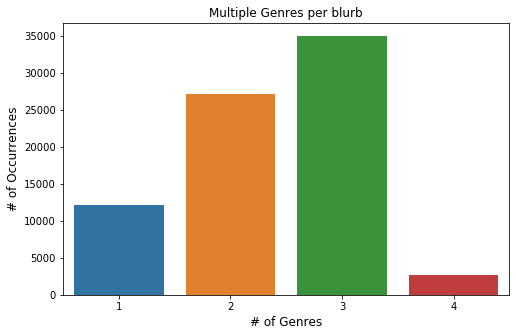

In [28]:
rowsums = df1.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple Genres per blurb")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Genres', fontsize=12)


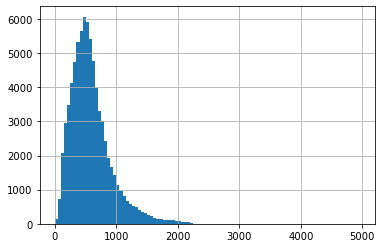

In [29]:
lens = df1.Summary.str.len()
lens.hist(bins = np.arange(0,5000,50))
 

In [32]:
train, test = train_test_split(df1, random_state=42, test_size=0.33, shuffle=True)
X_train = train.Summary
X_test = test.Summary
print(X_train.shape)
print(X_test.shape)

(51663,)
(25446,)


### TF-IDF Vectorization
<a id="three"></a>

In [30]:
from sklearn.model_selection import train_test_split
data=df1#if not removing stopwords
train, test = train_test_split(data, random_state=42, test_size=0.1, shuffle=True)
train_text=train.Summary
test_text=test.Summary
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

x_train = vectorizer.transform(train_text)

y_train = train.drop(labels = ['Summary','Name'], axis=1)

x_test = vectorizer.transform(test_text)

y_test =test.drop(labels = ['Summary','Name'], axis=1)

### Classification and Accuracy
<a id="four"></a>

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
stop_words = set(stopwords.words('english'))

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(train_text, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(test_text)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))


... Processing Nonfiction
Test accuracy is 0.9399559071456361
... Processing Fiction
Test accuracy is 0.9297108027493192
... Processing Children’s Books
Test accuracy is 0.9569446245623136
... Processing Children’s Middle Grade Books
Test accuracy is 0.946958889897549
... Processing Literary Fiction
Test accuracy is 0.9425496044611594
... Processing Mystery and Suspense
Test accuracy is 0.9712099597976916
... Processing Romance
Test accuracy is 0.9744520814420957
... Processing Biography and Memoir
Test accuracy is 0.9561665153676566
... Processing Religion and Philosophy
Test accuracy is 0.9728958630527818
... Processing Religion
Test accuracy is 0.9813253793282324
... Processing Graphic Novels and Manga
Test accuracy is 0.9854752950330696
... Processing Classics
Test accuracy is 0.9788613668784852
... Processing Teen and Young Adult
Test accuracy is 0.9701724808714823
... Processing Cooking
Test accuracy is 0.9948126053689534
... Processing Suspense and Thriller
Test accuracy is 0.97

KeyboardInterrupt: 

### MultiLabel Binarizer and Corresponding F1 score
<a id="five"></a>

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score
import math

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df0['Genres'])

# transform target variable
y = multilabel_binarizer.transform(df0['Genres'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain, xval, ytrain, yval = train_test_split(df0['Summary'], y, test_size=0.2, random_state=9)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

lr = LogisticRegression(max_iter=math.inf)
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)

y_pred = clf.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.2505 # threshold value 0.2505 -> 0.7110468896756014
y_pred_new = (y_pred_prob >= t).astype(int)
f1_score(yval, y_pred_new, average="micro")



0.7136495754642689

In [35]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    return text


def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)





def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred_prob = clf.predict_proba(q_vec)
    t = 0.2505 # threshold value 0.2505 -> 0.7110468896756014
    q_pred_new = (q_pred_prob >= t).astype(int)

    return multilabel_binarizer.inverse_transform(q_pred_new)

for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Book: ", df0['Name'][k], "\nPredicted  genre: ", infer_tags(xval[k])), print("Actual genre: ",df0['Genres'][k], "\n")

    

Book:  The Art of Betty and Veronica 
Predicted  genre:  [('Art', 'Arts and Entertainment', 'Nonfiction')]
Actual genre:  ['Art', 'Arts and Entertainment', 'Humor'] 

Book:  Strong Enough 
Predicted  genre:  [('Contemporary Romance', 'Fiction', 'Romance', 'Teen and Young Adult')]
Actual genre:  ['Suspense Romance', 'Romance', 'Fiction'] 

Book:  Strange Relations 
Predicted  genre:  [('Children’s Books', 'Children’s Middle Grade Books')]
Actual genre:  ['Teen and Young Adult Fiction', 'Teen and Young Adult'] 

Book:  Accidentally in Love 
Predicted  genre:  [('Contemporary Romance', 'Fiction', 'Romance')]
Actual genre:  ['Contemporary Romance', 'Romance', 'Fiction'] 

Book:  Tell Them Who I Am 
Predicted  genre:  [()]
Actual genre:  ['Nonfiction'] 



# CMU Book Summary Dataset
<a id="six"></a>

## Extracting the data

In [36]:
df=pd.read_csv('ds_beforeduplication.csv')
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
8794,16541,Nevermore: The Final Maximum Ride Adventure,Young adult literature,The prologue is Angel's vision of Max's death...
8795,16542,The Bourne Imperative,Thriller,:For a more detailed background of the main c...
8796,16551,Remote Control,Thriller,The series follows the character of Nick Ston...
8797,16555,Transfer of Power,Thriller,The reader first meets Rapp while he is doing...


In [37]:
df.Genres.value_counts()

fiction                   1615
Children's literature     1152
Science Fiction            999
Novel                      925
Mystery                    734
historical                 727
Fantasy                    624
Thriller                   568
Young adult literature     321
comedy                     174
autobiography              170
Non-fiction                166
Spy fiction                112
Horror                      88
Romance novel               68
Adventure novel             60
Picture book                49
Memoir                      43
Biography                   39
Techno-thriller             37
Short story                 36
Literary fiction            27
Philosophy                  23
Urban fantasy               22
Sword and sorcery           20
Name: Genres, dtype: int64

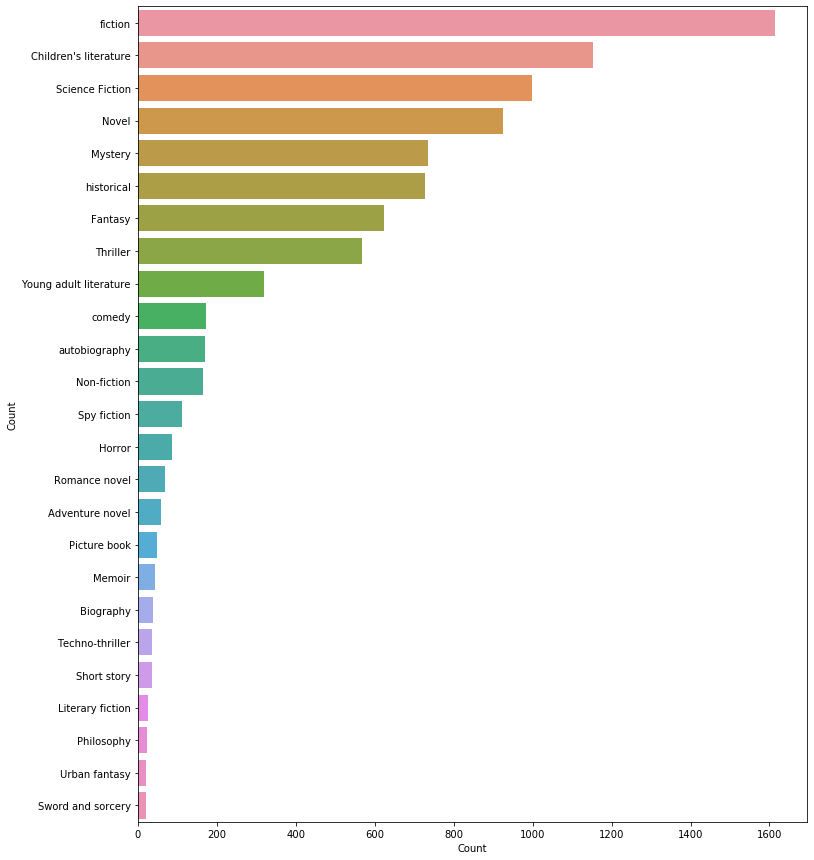

In [38]:
import nltk as nltk
import seaborn as sns
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

## Data Augmentation
<a id="seven"></a>

In [39]:
import random
from random import shuffle
stop_words = set(stopwords.words('english'))
from nltk.corpus import wordnet

In [40]:
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop_words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name().replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [41]:
synonym_replacement(['hello','pretty','ugly','cloud','both','how'],3)

['how', 'do', 'you', 'do', 'pretty', 'frightful', 'fog', 'both', 'how']

In [42]:
glist2=["Horror",
"Romance novel",
"Adventure novel",
"Picture book",
"Memoir",
"Biography",
"Techno-thriller",
"Short story",
"Literary fiction",
"Philosophy",
"Urban fantasy",
"Sword and sorcery",

]

glist3=[
 'comedy',
 'autobiography',
 'Non-fiction',
 'Spy fiction']
glist4=['Young adult literature',
 'Mystery',
 'historical',
 'Fantasy',
 'Thriller',]



In [43]:
def applysynonym(row):
    words=word_tokenize(row)
    n=len(words)
    res=synonym_replacement(words,n//10)
    return ' '.join(res)

In [44]:
def augmentdata(g,n):
    global df
    temp=df[df.Genres==g]
    temp1=temp
    for i in range(n):
        temp1.Summary=temp.Summary.apply(applysynonym)
        df=df.append(temp1,ignore_index=True)
    return

In [45]:
#augmenting different genres different number of times so that overall distribution is even
for g in glist2:
    augmentdata(g,10)

for g in tqdm(glist3):
    augmentdata(g,8)

for g in tqdm(glist4):
    augmentdata(g,1)

df

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.49s/it]


,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
21864,16414,Carver,Thriller,"The central character , Samuel sculptor , is a..."
21865,16442,Rabies,Thriller,"Set in too soon 1980s , during the pinnacle of..."
21866,16542,The Bourne Imperative,Thriller,: For a more detail background of the main cha...
21867,16551,Remote Control,Thriller,The series adopt the character reference of Ni...


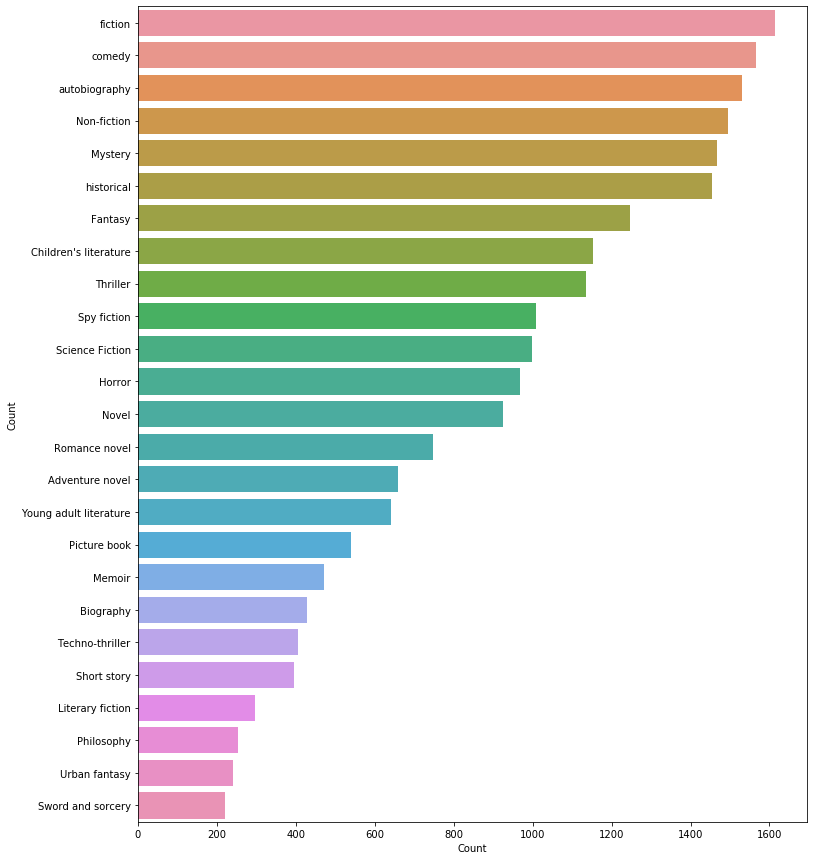

In [46]:
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [47]:
df.Genres.value_counts()

fiction                   1615
comedy                    1566
autobiography             1530
Non-fiction               1494
Mystery                   1468
historical                1454
Fantasy                   1248
Children's literature     1152
Thriller                  1136
Spy fiction               1008
Science Fiction            999
Horror                     968
Novel                      925
Romance novel              748
Adventure novel            660
Young adult literature     642
Picture book               539
Memoir                     473
Biography                  429
Techno-thriller            407
Short story                396
Literary fiction           297
Philosophy                 253
Urban fantasy              242
Sword and sorcery          220
Name: Genres, dtype: int64

## Data cleaning
<a id="eight"></a>

In [48]:

def remove_stopwords(data):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(str(data))
    
    filtered_data = ""
    
    for w in word_tokens:
        if w not in stop_words and len(w)>1:
            filtered_data=filtered_data+" "+w
    return filtered_data
    
def remove_punctuation(data):
    marks="~!@#$%^&*()_+=-`[]\;'./{}|:<>?""'\n"
    
    for i in marks:
        data=np.char.replace(data,i,' ')
        data=np.char.replace(data,"  "," ")
    
    data=np.char.replace(data,",",'')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    
    return new_text

def lemmatize(data):
    wnl=WordNetLemmatizer()
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + wnl.lemmatize(w)
    
    return new_text


def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def preprocess(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
    data = stemming(data)
    
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data


def preprocesswithoutstem(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
#     data = stemming(data)
    
    data = remove_punctuation(data)
#     data = stemming(data) #needed again as we need to stem the words
#     data = remove_punctuation(data)
    data = convert_numbers(data)
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data


In [49]:
df.Summary=df.Summary.apply(preprocesswithoutstem)
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...
21864,16414,Carver,Thriller,central character samuel sculptor ex assassin...
21865,16442,Rabies,Thriller,set soon 1980s pinnacle cold war novel follow...
21866,16542,The Bourne Imperative,Thriller,detail background main character see jason bo...
21867,16551,Remote Control,Thriller,series adopt character reference nick stone e...


## Classifying using augemented data
<a id="nine"></a>

In [55]:
X=df.Summary
Y=df.Genres.values
X.shape, Y.shape

((21869,), (21869,))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [57]:
type(X_train), type(Y_train)
X_train.shape, Y_train.shape

((15308,), (15308,))

In [58]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [59]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.8125285779606767
                        precision    recall  f1-score   support

       Adventure novel       0.93      1.00      0.96       211
             Biography       0.83      1.00      0.91       112
 Children's literature       0.67      0.50      0.57       330
               Fantasy       0.81      0.77      0.79       361
                Horror       0.87      1.00      0.93       299
      Literary fiction       0.86      0.99      0.92        85
                Memoir       0.90      1.00      0.95       145
               Mystery       0.74      0.83      0.78       452
           Non-fiction       0.87      1.00      0.93       466
                 Novel       0.46      0.09      0.15       296
            Philosophy       0.94      0.99      0.96        74
          Picture book       0.89      0.98      0.94       162
         Romance novel       0.86      1.00      0.92       213
       Science Fiction       0.79      0.72      0.75       283
           

# Dumping into pickle file
<a id="ten"></a>

In [60]:
import pickle
with open('singlelabel.pickle', 'wb') as f:
    pickle.dump(sgd, f)